In [2]:
from stardist.models import StarDist2D 

# prints a list of available models 
StarDist2D.from_pretrained() 

# creates a pretrained model
model = StarDist2D.from_pretrained('2D_versatile_fluo')

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [5]:
from skimage import io
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [22]:
def plot_pred_overlay(img, labels, zoom=False):
    '''Plots image and predicted labels
    
    :param img: 2D image 
    :type img: ndarray
    :param labels: color-labels of pixels in img
    :type labels: ndarray
    :param zoom: [x1, y1, x2, y2], area of img where you want to zoom in
    :rtype zoom: list, opt
    
    '''
    
    if zoom:
        x1, y1, x2, y2 = zoom
    else:
        x1, y1 = [0,0]
        x2, y2 = img.shape
        
    fig = plt.figure(figsize=(24, 24))

    plt.subplot(1,2,1)
    plt.imshow(img_tau_gray[x1:x2, y1:y2], cmap='gray')
    plt.axis("off")
    plt.title("input image")

    plt.subplot(1,2,2)
    plt.imshow(render_label(labels_tau[x1:x2, y1:y2], img=img_tau_gray[x1:x2, y1:y2]))
    plt.axis("off")
    plt.title("prediction + input overlay")

    plt.show()

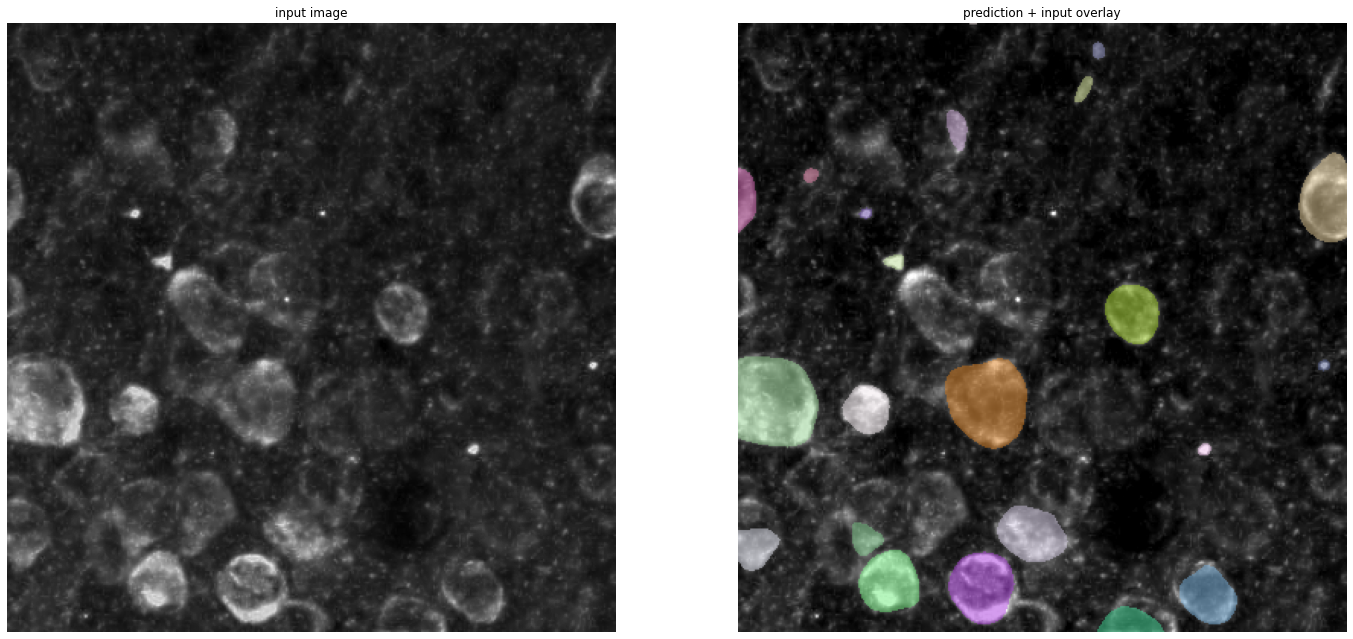

In [26]:
img_tau = io.imread('../data/raw/0104_p301s_tau.jpg') 
img_tau_gray = rgb2gray(img_tau)
labels_tau, _ = model.predict_instances(normalize(img_tau_gray))
zoom_area = [400, 400, 800, 800]
plot_pred_overlay(img_tau_gray, labels_tau, zoom=zoom_area)

In [12]:
x2, y2 = img_tau_gray.shape
print(x2)
print(y2)

2048
2048


In [13]:
x1, y1 = (0,0)
print(x1)
print(y1)

0
0


In [14]:
a, b, c, d = [1, 2, 3, 4]
print(a)

1


In [15]:
type(img_tau_gray)

numpy.ndarray

In [18]:
type(labels_tau)

numpy.ndarray

In [19]:
labels_tau.shape

(2048, 2048)